<a href="https://colab.research.google.com/github/Jose-AE/TC1002S/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actividad: Patrones con K-means

### Osmar Araico Gonzalez-A01664590
### Jose Luis Almeida Esparza-A01028493


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Paso 1: Carga tus datos (reemplaza 'data.csv' con tu archivo de datos)
df = pd.read_csv("/content/covid19_tweets.csv")

df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Optamos por restringir nuestro conjunto de variables a solamente dos: user_followers y user_friends. Esta elección se basó en la falta de valores numéricos en las demás variables, lo que conllevaba un mayor grado de dificultad al momento de realizar un análisis exhaustivo.

In [ ]:
df2 = pd.DataFrame(df[["user_followers", "user_friends"]])

df2.head()

,user_followers,user_friends
0,624,950
1,2253,1677
2,9275,9525
3,197,987
4,101009,168


In [ ]:
# Normalizamos los datos para obtener mejores datos

for col in df2.columns:
    avg = df2[col].mean()
    sd = df2[col].std()
    df2[col] = df[col].apply(lambda x: (x - avg) / sd)

df2.head()

,user_followers,user_friends
0,-0.128090,-0.128633
1,-0.126109,-0.051008
2,-0.117570,0.786953
3,-0.128610,-0.124682
4,-0.006010,-0.212130


<Axes: xlabel='user_followers'>

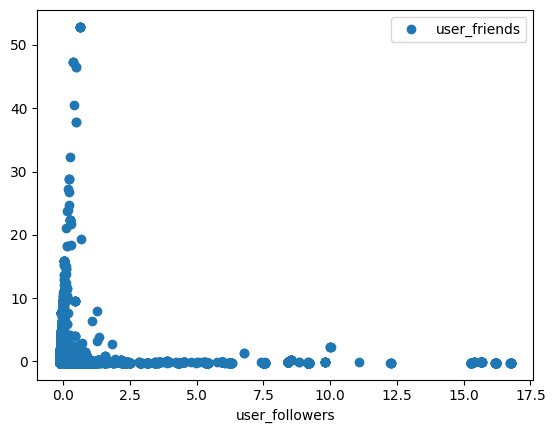

In [ ]:
df2.plot(x="user_followers", y="user_friends", style="o")

#Obteniendo K

## ¿Cómo obtuviste el valor de k a usar?

Basándonos en la gráfica obtenida, seleccionaremos 2 clusters para el análisis debido a su disminución lineal. El valor de dos se adapta mejor para determinar el número de clusters.






In [ ]:
km = KMeans(n_clusters=2)
df2["cluster"] = km.fit_predict(df2)

df2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_followers,user_friends,cluster
0,-0.128090,-0.128633,0
1,-0.126109,-0.051008,0
2,-0.117570,0.786953,0
3,-0.128610,-0.124682,0
4,-0.006010,-0.212130,0


In [ ]:
df2["cluster"].value_counts()

0    73767
1      669
Name: cluster, dtype: int64

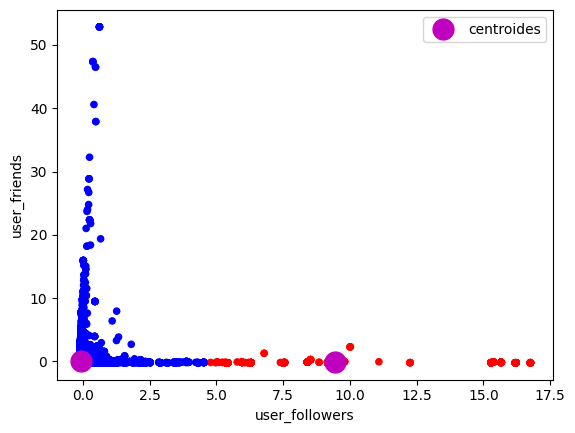

In [ ]:
centers = km.cluster_centers_

col = df2["cluster"].map({0: "b", 1: "r"})
df2.plot.scatter(x="user_followers", y="user_friends", style="o", c=col)
plt.plot(centers[:, 0], centers[:, 1], "mo", markersize=15, label="centroides")
plt.legend(loc="best")

## ¿Los centros son representativos de los datos?


Sí, la clasificación es representativa de los datos. La gráfica y tabla muestran que el cluster 0 agrupa a usuarios con pocos followers, mientras que el cluster 1 agrupa a usuarios con muchos followers y pocos amigos.

## ¿Los centros serían más representativos con un valor más alto?


En este caso, debido al análisis de la gráfica de inercia, y como el algoritmo correctamente clasificó a los grupos en gente con muchos followers y gente con pocos followers, podemos afirmar que los centros no necesariamente serían más representativos con un valor más alto

In [ ]:
print(centers)

[[-8.55787506e-02  1.47014860e-03]
 [ 9.43630448e+00 -1.62105309e-01]]


¿Qué distancia tienen los centros entre sí?

La distancia es de 9.5232
Considerando la normalización de los datos, podemos decir que los centros están adecuadamente distanciados para una correcta clasificación.

In [ ]:
point1 = np.array(centers[0])
point2 = np.array(centers[1])

distance = np.linalg.norm(point1 - point2)
print(distance)


9.523288145923837


<Axes: >

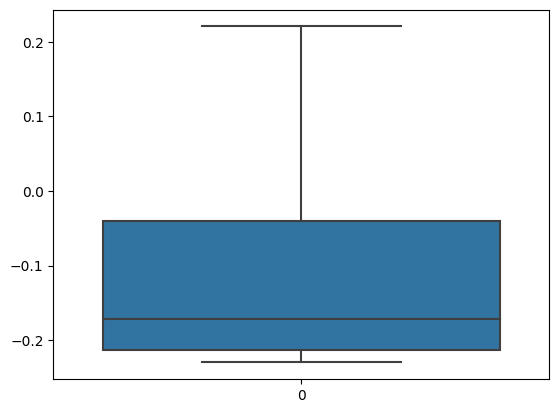

In [ ]:
import seaborn as sns

sns.boxplot(data=df2["user_friends"], showfliers=False)

<Axes: >

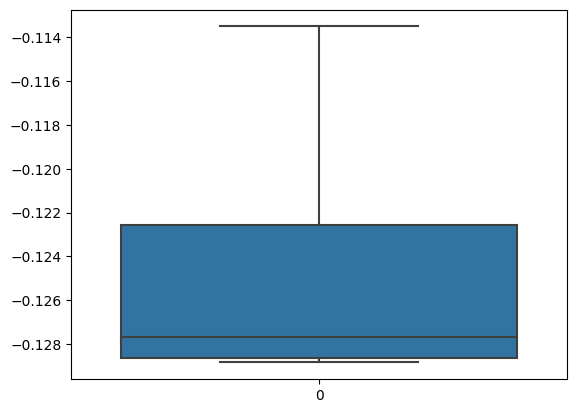

In [ ]:
sns.boxplot(data=df2["user_followers"], showfliers=False)

##¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Si existieran valores atípicos, la distancia entre los centros podría ser mayor, comprometiendo la fiabilidad del análisis.


## ¿Qué puedes decir de los datos basándose en los centros?

Podemos concluir con los datos obtenidos que hay dos tipos de usuarios: "Personas con influencia", que tienen muchos seguidores y pocos amigos, y usuarios "Personas normales" con casi igual número de seguidores y amigos.